In [9]:
import numpy as np
from matplotlib import pyplot, cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import HTML

Solving 2D Diffusion Convection Equation using Finite Difference Method

------------------------------------------------
Plotting Innitial Solution: Cuboidic Wave Profile
------------------------------------------------


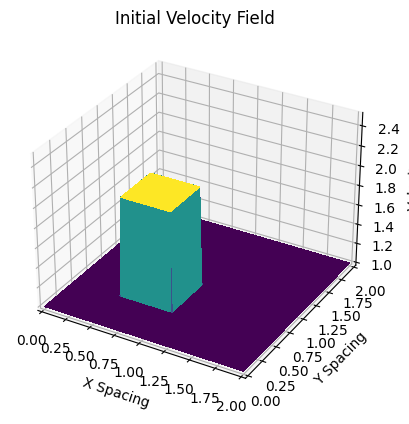

In [20]:
lineSingle = '------------------------------------------------'

print("Solving 2D Diffusion Convection Equation using Finite Difference Method\n")

nx = 101                  #grid points in x-Direction
ny = 101                  #grid points in y-Direction
nu = 0.05                #viscosity

#grid spacing

dx = 2/(nx-1)
dy = 2/(ny-1)

cfl = 0.25
dt =  cfl*dx*dy/nu       #time step based on von neumann stability analysis   
nt = 1000000                  #number of time step

x = np.linspace(0, 2, nx)       #array along x
y = np.linspace(0, 2, ny)       #array along y

#2d temporaray array where we copy our velocity field

u = np.ones((ny,nx))
un = np.ones((ny,nx))

#innitial condition
#Cuboidic Wave Profile

u[int(0.5/dy):int(1/dy + 1),int(0.5/dx):int(1/dx+1)] = 2

#plotting innitial condition

print(lineSingle)
print("Plotting Innitial Solution: Cuboidic Wave Profile")
print(lineSingle)


fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(x, y)
surf = ax.plot_surface(X,Y,u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

ax.set_title('Initial Velocity Field')
ax.set_xlabel('X Spacing')
ax.set_ylabel('Y Spacing')
ax.set_zlabel('Velocity')


ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(1,2.5)

plt.show()

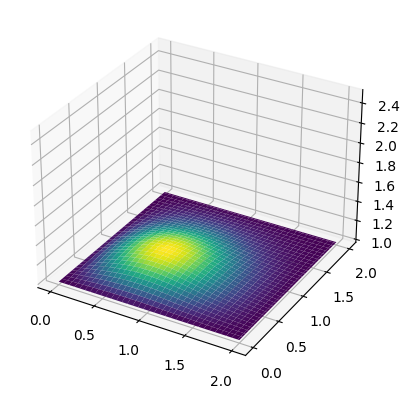

In [23]:
# 초기 그래프 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis, edgecolor='none')
ax.set_zlim(1, 2.5)
ax.set_title('Velocity Field')
ax.set_xlabel('X Spacing')
ax.set_ylabel('Y Spacing')
ax.set_zlabel('Velocity')

# 업데이트 함수
def update(n):
    un = u.copy()
    u[1:-1,1:-1] = (un[1:-1,1:-1] + (nu*dt/dx**2)*(un[2:,1:-1] -2*un[1:-1,1:-1] + un[0:-2,1:-1]) + (nu*dt/dy**2)*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]))
    u[0,:]  = 1
    u[-1,:] = 1
    u[:,0]  = 1
    u[:,-1] = 1
    ax.clear()
    ax.plot_surface(X, Y, u, cmap=cm.viridis, edgecolor='none')
    ax.set_zlim(1, 2.5)

# 애니메이션 객체 생성
ani = FuncAnimation(fig, update, frames=np.arange(0, nt+1, 1000), repeat=False)

HTML(ani.to_html5_video())